In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
df = pd.read_csv('C:/Users/Dell/OneDrive/Desktop/DMO/TCS.NS.csv',usecols=[3,4,5])
df

,Low,Close,Adj Close
0,3309.000000,3335.500000,3228.370850
1,3292.000000,3332.600098,3225.563965
2,3321.449951,3355.350098,3247.583252
3,3317.750000,3349.000000,3241.437256
4,3321.000000,3343.449951,3236.065430
...,...,...,...
244,3366.000000,3370.449951,3370.449951
245,3369.550049,3381.550049,3381.550049
246,3342.050049,3347.449951,3347.449951
247,3322.350098,3333.449951,3333.449951


In [52]:
df.columns

Index(['Low', 'Close', 'Adj Close'], dtype='object')

<h3>Train Test Split</h3>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Adj Close', axis=1),df['Adj Close'],test_size=0.3,random_state=42)

In [54]:
X_train.shape, X_test.shape

((174, 2), (75, 2))

<h2>Standardization</h2>

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
scaler.mean_

array([3326.67443852, 3353.51322149])

In [57]:
X_train

,Low,Close
82,3290.000000,3331.000000
29,3217.000000,3228.350098
126,3195.000000,3199.850098
79,3359.000000,3371.850098
86,3172.000000,3185.000000
...,...,...
106,3071.500000,3089.600098
14,3413.000000,3439.149902
92,3106.000000,3120.500000
179,3413.600098,3440.649902


In [58]:
X_train_scaled

array([[-0.3006266 , -0.18156042],
       [-0.89902   , -1.00939214],
       [-1.07935774, -1.2392336 ],
       [ 0.26497812,  0.14787981],
       [-1.26789264, -1.35899389],
       [-0.43997849, -0.56462953],
       [ 0.23218944,  0.44223818],
       [ 0.84738744,  0.71441886],
       [-0.84205007, -0.76866463],
       [ 2.03761609,  2.03741702],
       [ 1.37979321,  1.18216641],
       [ 0.31416114,  0.18255606],
       [-0.62482507, -0.76906825],
       [ 2.07655265,  2.03661175],
       [-1.39904736, -1.44044727],
       [-0.78016104, -0.75818024],
       [ 0.39613283,  0.30070383],
       [-0.74983191, -0.74245464],
       [-0.66867872, -0.75656771],
       [-0.45514406, -0.20010942],
       [ 0.41416621,  0.29505899],
       [ 0.11660854,  0.09545983],
       [-1.80890585, -1.86464472],
       [ 1.13387812,  1.15595642],
       [-1.10272047, -1.12673265],
       [ 0.74287352,  0.66764371],
       [-1.82447967, -1.73077334],
       [-0.99451622, -1.16302341],
       [ 0.46212045,

In [59]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [60]:
np.round(X_train.describe(), 1)

,Low,Close
count,174.0,174.0
mean,3326.7,3353.5
std,122.3,124.4
min,3071.5,3089.6
25%,3233.5,3259.7
50%,3321.0,3349.9
75%,3413.1,3440.3
max,3605.0,3628.9


In [61]:
np.round(X_train_scaled.describe(), 1)

,Low,Close
count,174.0,174.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.1,-2.1
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.7,0.7
max,2.3,2.2


<h2>Effect of Scaling</h2>

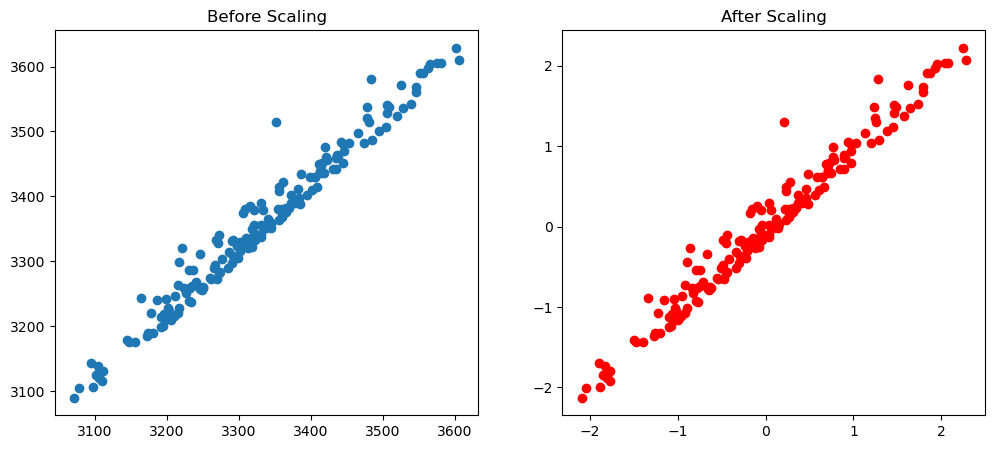

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Low'], X_train['Close'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Low'], X_train_scaled['Close'],color='red')
ax2.set_title("After Scaling")
plt.show()

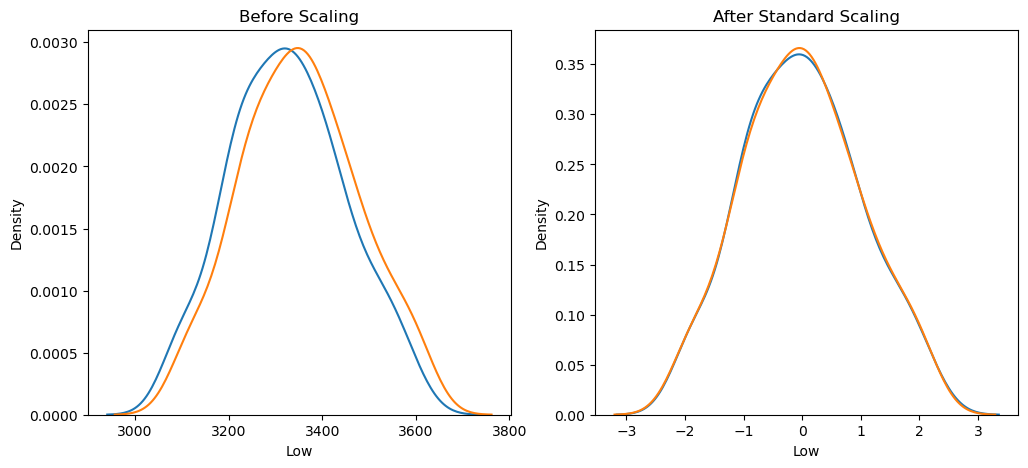

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Low'], ax=ax1)
sns.kdeplot(X_train['Close'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Low'], ax=ax2)
sns.kdeplot(X_train_scaled['Close'], ax=ax2)
plt.show()

<h2>Comparison of Distributions</h2>

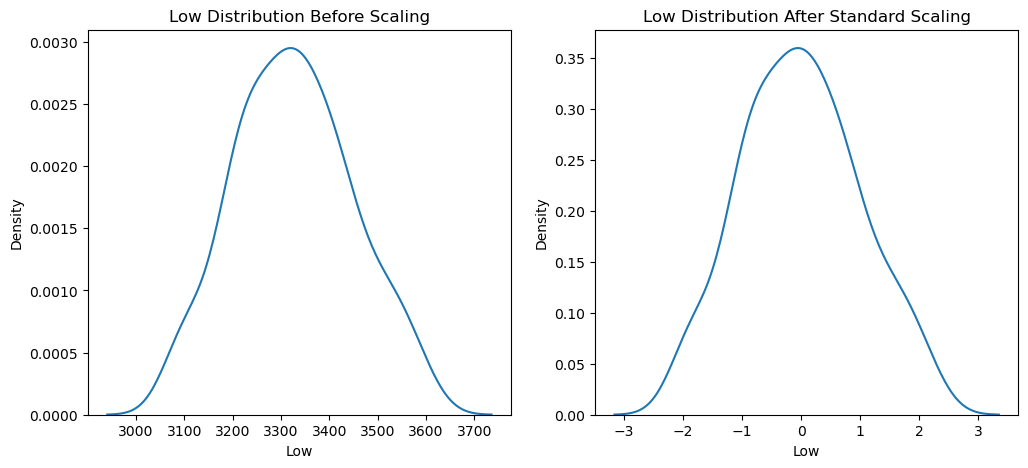

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Low Distribution Before Scaling')
sns.kdeplot(X_train['Low'], ax=ax1)

# after scaling
ax2.set_title('Low Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Low'], ax=ax2)
plt.show()

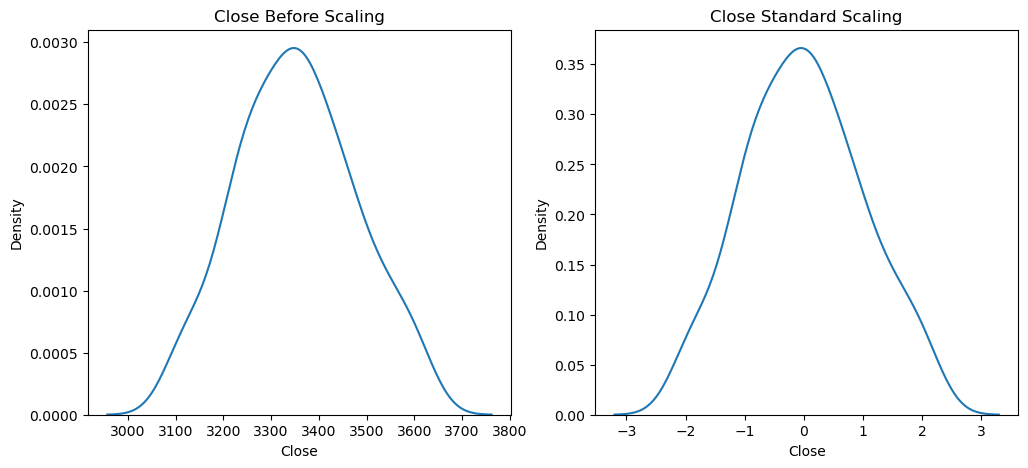

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Close Before Scaling')
sns.kdeplot(X_train['Close'], ax=ax1)

# after scaling
ax2.set_title('Close Standard Scaling')
sns.kdeplot(X_train_scaled['Close'], ax=ax2)
plt.show()